In [1173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1174]:
# read Aviation_Data.csv located in the data folder in this directory
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)

In [1175]:
# check the first 5 rows of the data
df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


Demonstrating the relationship between whether a plane is amateur built and the amount of damage to the aircraft after a crash:

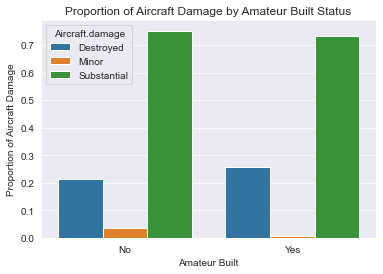

In [1176]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# First clean the data by removing any rows with a null value in the Amateur.Built column
df_amateur = df[df['Amateur.Built'].notna()]

# We then get rid of any rows in df_amateur that have a null value in the Aircraft.damage column
df_amateur = df_amateur[df_amateur['Aircraft.damage'].notna()]

# Get rid of any row in df_amateur that has an Aircraft.damage value of 'Unknown'
df_amateur = df_amateur[df_amateur['Aircraft.damage'] != 'Unknown']

# Calculate the count of each damage category for both amateur built and non-amateur built aircraft
damage_counts = df_amateur.groupby(['Amateur.Built', 'Aircraft.damage']).size().reset_index(name='count')

# Calculate the total count of aircraft for both amateur built and non-amateur built groups
group_totals = damage_counts.groupby('Amateur.Built')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
damage_counts = damage_counts.merge(group_totals, on='Amateur.Built')

# Calculate the proportion of each damage category for both amateur built and non-amateur built aircraft
damage_counts['proportion'] = damage_counts['count'] / damage_counts['total']

# Generate a bar plot showing the relationship between amateur built and the proportion of damage to the aircraft
sns.barplot(x='Amateur.Built', y='proportion', hue='Aircraft.damage', data=damage_counts)
plt.xlabel('Amateur Built')
plt.ylabel('Proportion of Aircraft Damage')
plt.title('Proportion of Aircraft Damage by Amateur Built Status')
plt.show()



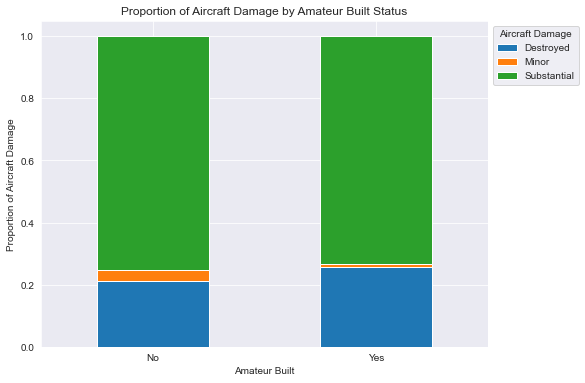

In [1177]:
# Calculate the count of each damage category for both amateur built and non-amateur built aircraft
damage_counts = df_amateur.groupby(['Amateur.Built', 'Aircraft.damage']).size().reset_index(name='count')

# Calculate the total count of aircraft for both amateur built and non-amateur built groups
group_totals = damage_counts.groupby('Amateur.Built')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
damage_counts = damage_counts.merge(group_totals, on='Amateur.Built')

# Calculate the proportion of each damage category for both amateur built and non-amateur built aircraft
damage_counts['proportion'] = damage_counts['count'] / damage_counts['total']

# Pivot the data to create a dataframe suitable for a stacked bar chart
stacked_data = damage_counts.pivot_table(index='Amateur.Built', columns='Aircraft.damage', values='proportion').reset_index()

# Create a stacked bar chart
ax = stacked_data.plot(x='Amateur.Built', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Amateur Built')
plt.ylabel('Proportion of Aircraft Damage')
plt.title('Proportion of Aircraft Damage by Amateur Built Status')
plt.xticks(ticks=range(len(stacked_data['Amateur.Built'])), labels=stacked_data['Amateur.Built'], rotation=0)

# Add legend and show the plot
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

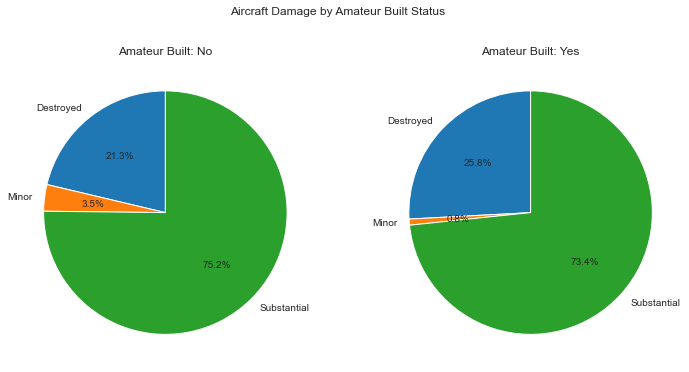

In [1178]:
# Plot pie charts for each group
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Aircraft Damage by Amateur Built Status')

# Define group labels
group_labels = ['No', 'Yes']

for i, group in enumerate(group_labels):
    # Filter data for the current group
    group_data = damage_counts[damage_counts['Amateur.Built'] == group]

    # Plot pie chart
    axes[i].pie(group_data['count'], labels=group_data['Aircraft.damage'], autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f"Amateur Built: {group}")

# Show the plot
plt.show()

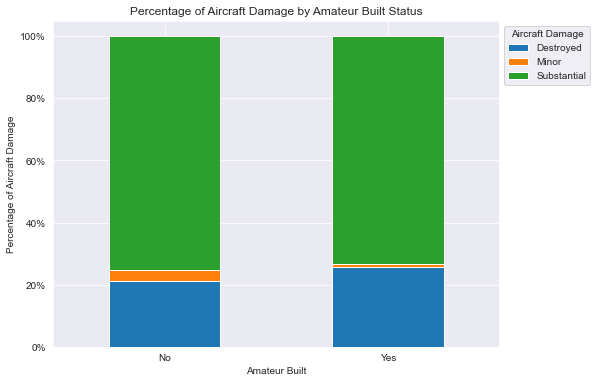

In [1179]:
# Create a 100% stacked bar chart
ax = stacked_data.plot(x='Amateur.Built', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Amateur Built')
plt.ylabel('Percentage of Aircraft Damage')
plt.title('Percentage of Aircraft Damage by Amateur Built Status')
plt.xticks(ticks=range(len(stacked_data['Amateur.Built'])), labels=stacked_data['Amateur.Built'], rotation=0)

# Format y-axis as percentage
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0%}'.format(x)))

# Add legend and show the plot
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

The 100% stacked bar chart and other visuals above clearly show that amateur built aircraft are more likely to sustain more damage in a crash than non-amateur built aircraft. This is likely due to the fact that amateur built aircraft are less likely to have the same safety features as non-amateur built aircraft.

Which is safer, Helicopters or Airplanes?

In [1180]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [1181]:
# create a new dataframe with only the Helicopter and Airplane data
helicopter_airplane = df[(df['Aircraft.Category'] == 'Helicopter') | (df['Aircraft.Category'] == 'Airplane')]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1182]:
# remove all rows with value of 'Unknown' in the Aircraft.damage column
helicopter_airplane = helicopter_airplane[helicopter_airplane['Aircraft.damage'] != 'Unknown']
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1183]:
# # remove all rows with null values in the Aircraft.damage column
helicopter_airplane = helicopter_airplane[helicopter_airplane['Aircraft.damage'].notna()]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1184]:
# # remove all null values in the Injury.Severity column
helicopter_airplane = helicopter_airplane[helicopter_airplane['Injury.Severity'].notna()]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1185]:
# # there are several different values for Fatal that have formats like 'Fatal(1)' or 'Fatal(130)'. Combine all of these values into one value by looking if the first 5 characters are 'Fatal'. we can't simply look for 'Fatal' because there are 'Non-Fatal' values that we want to keep separate
helicopter_airplane['Injury.Severity'] = helicopter_airplane['Injury.Severity'].apply(lambda x: 'Fatal' if x[:5] == 'Fatal' else x)
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1186]:
# # remove all rows with Engine.Type values of 'Unknown'
helicopter_airplane = helicopter_airplane[helicopter_airplane['Engine.Type'] != 'Unknown']
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1187]:
# # remove all rows with Engine.Type values of null
helicopter_airplane = helicopter_airplane[helicopter_airplane['Engine.Type'].notna()]
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1188]:
# # remove all rows with Engine.Type values of 'UNK'
helicopter_airplane = helicopter_airplane[helicopter_airplane['Engine.Type'] != 'UNK']
helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


In [1189]:
 # remove all rows with Broad.phase.of.flight values of 'Unknown'
helicopter_airplane = helicopter_airplane[helicopter_airplane['Broad.phase.of.flight'] != 'Unknown']

# remove all rows with Broad.phase.of.flight values of null
helicopter_airplane = helicopter_airplane[helicopter_airplane['Broad.phase.of.flight'].notna()]

helicopter_airplane.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
5,20170710X52551,Accident,NYC79AA106,1979-09-17,"BOSTON, MA",United States,42.445277,-70.758333,NaN,NaN,...,NaN,Air Canada,NaN,NaN,1.0,44.0,VMC,Climb,Probable Cause,19-09-2017
7,20020909X01562,Accident,SEA82DA022,1982-01-01,"PULLMAN, WA",United States,NaN,NaN,NaN,BLACKBURN AG STRIP,...,Personal,NaN,0.0,0.0,0.0,2.0,VMC,Takeoff,Probable Cause,01-01-1982
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
12,20020917X02148,Accident,FTW82FRJ07,1982-01-02,"HOMER, LA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,0.0,1.0,0.0,IMC,Cruise,Probable Cause,02-01-1983
13,20020917X02134,Accident,FTW82FRA14,1982-01-02,"HEARNE, TX",United States,NaN,NaN,T72,HEARNE MUNICIPAL,...,Personal,NaN,1.0,0.0,0.0,0.0,IMC,Takeoff,Probable Cause,02-01-1983


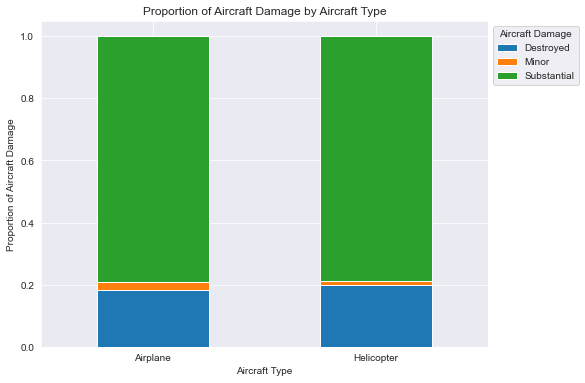

In [1190]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the DataFrame to keep only the rows with 'Helicopter' or 'Airplane' values in the 'Aircraft.Category' column
filtered_data = helicopter_airplane[helicopter_airplane['Aircraft.Category'].isin(['Helicopter', 'Airplane'])]

# Perform a groupby operation on the filtered DataFrame using 'Aircraft.Category' and 'Aircraft.damage' columns, and compute the size of each group
damage_counts = filtered_data.groupby(['Aircraft.Category', 'Aircraft.damage']).size().reset_index(name='count')

# Calculate the total count of aircraft for both helicopter and airplane groups
group_totals = damage_counts.groupby('Aircraft.Category')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
damage_counts = damage_counts.merge(group_totals, on='Aircraft.Category')

# Calculate the proportion of each damage category for both helicopter and airplane aircraft
damage_counts['proportion'] = damage_counts['count'] / damage_counts['total']

# Pivot the data to create a dataframe suitable for a stacked bar chart
stacked_data = damage_counts.pivot_table(index='Aircraft.Category', columns='Aircraft.damage', values='proportion').reset_index()

# Create a 100% stacked bar chart
ax = stacked_data.plot(x='Aircraft.Category', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Aircraft Type')
plt.ylabel('Proportion of Aircraft Damage')
plt.title('Proportion of Aircraft Damage by Aircraft Type')
plt.xticks(ticks=range(len(stacked_data['Aircraft.Category'])), labels=stacked_data['Aircraft.Category'], rotation=0)

# Add legend and show the plot
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [1191]:
# Pivot the data to create a dataframe suitable for displaying the count of each damage category
count_table = damage_counts.pivot_table(index='Aircraft.Category', columns='Aircraft.damage', values='count', aggfunc='sum').reset_index()

# Calculate the percentage of each damage category for helicopters and airplanes
percentage_table = damage_counts.pivot_table(index='Aircraft.Category', columns='Aircraft.damage', values='proportion', aggfunc='sum').reset_index()

# Convert the percentage values to a more readable format (e.g., 25%)
percentage_table.iloc[:, 1:] = percentage_table.iloc[:, 1:].applymap(lambda x: f"{x * 100:.2f}%")

# Combine the count_table and percentage_table dataframes
combined_table = count_table.copy()
for col in count_table.columns[1:]:
    combined_table[col] = count_table[col].astype(str) + " (" + percentage_table[col] + ")"

# Display the combined table with count and percentage values
print(combined_table)

Aircraft.damage Aircraft.Category      Destroyed        Minor    Substantial
0                        Airplane  1142 (18.31%)  158 (2.53%)  4938 (79.16%)
1                      Helicopter   139 (19.77%)   10 (1.42%)   554 (78.81%)


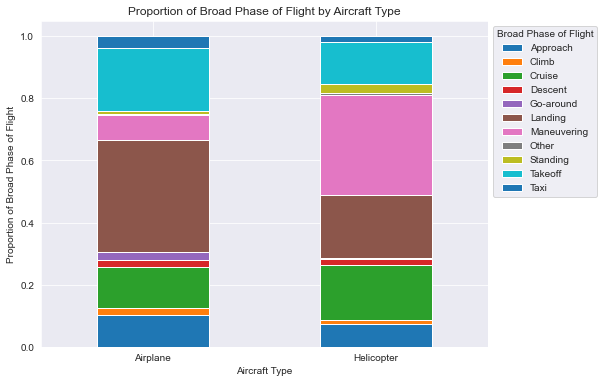

In [1192]:
# Filter the DataFrame to keep only the rows with 'Helicopter' or 'Airplane' values in the 'Aircraft.Category' column
filtered_data = helicopter_airplane[helicopter_airplane['Aircraft.Category'].isin(['Helicopter', 'Airplane'])]

# Perform a groupby operation on the filtered DataFrame using 'Aircraft.Category' and 'Broad.phase.of.flight' columns, and compute the size of each group
phase_counts = filtered_data.groupby(['Aircraft.Category', 'Broad.phase.of.flight']).size().reset_index(name='count')

# Calculate the total count of aircraft for both helicopter and airplane groups
group_totals = phase_counts.groupby('Aircraft.Category')['count'].sum().reset_index(name='total')

# Merge the dataframes to include the total count of each group
phase_counts = phase_counts.merge(group_totals, on='Aircraft.Category')

# Calculate the proportion of each phase category for both helicopter and airplane aircraft
phase_counts['proportion'] = phase_counts['count'] / phase_counts['total']

# Pivot the data to create a dataframe suitable for a stacked bar chart
stacked_data = phase_counts.pivot_table(index='Aircraft.Category', columns='Broad.phase.of.flight', values='proportion').reset_index()

# Create a 100% stacked bar chart
ax = stacked_data.plot(x='Aircraft.Category', kind='bar', stacked=True, figsize=(8, 6))

# Set labels and title
plt.xlabel('Aircraft Type')
plt.ylabel('Proportion of Broad Phase of Flight')
plt.title('Proportion of Broad Phase of Flight by Aircraft Type')
plt.xticks(ticks=range(len(stacked_data['Aircraft.Category'])), labels=stacked_data['Aircraft.Category'], rotation=0)

# Add legend and show the plot
plt.legend(title='Broad Phase of Flight', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [1193]:
# Define the point system for 'Aircraft.damage' and 'Injury.Severity'
damage_points = {'Destroyed': 5, 'Substantial': 3, 'Minor': 1}
severity_points = {'Incident': 1, 'Minor': 2, 'Serious': 3, 'Non-Fatal': 4, 'Fatal': 5}

# Replace the 'Aircraft.damage' and 'Injury.Severity' values with their corresponding point values
helicopter_airplane['Aircraft.damage.points'] = helicopter_airplane['Aircraft.damage'].map(damage_points)
helicopter_airplane['Injury.Severity.points'] = helicopter_airplane['Injury.Severity'].map(severity_points)

# Calculate the average point value for each make and model
grouped_data = helicopter_airplane.groupby(['Make', 'Model']).agg({'Aircraft.damage.points': 'mean', 'Injury.Severity.points': 'mean'}).reset_index()

# # Compute the weighted average using the given weights
# grouped_data['Safety.Score'] = (grouped_data['Aircraft.damage.points'] * 0.75) + (grouped_data['Injury.Severity.points'] * 0.25)
#
# # Sort the dataframe by the safety score
# sorted_data = grouped_data.sort_values(by='Safety.Score', ascending=True)
#
# # Display the safety score for each make and model
# print(sorted_data[['Make', 'Model', 'Safety.Score']])


In [1194]:
# Calculate the total points and the total number of incidents for each make and model
grouped_data = helicopter_airplane.groupby(['Make', 'Model']).agg({'Aircraft.damage.points': 'sum', 'Injury.Severity.points': 'sum', 'Event.Id': 'count'}).reset_index()

# Normalize the scores by dividing the total points by the total number of incidents
grouped_data['Normalized.Aircraft.damage.points'] = grouped_data['Aircraft.damage.points'] / grouped_data['Event.Id']
grouped_data['Normalized.Injury.Severity.points'] = grouped_data['Injury.Severity.points'] / grouped_data['Event.Id']

# Compute the weighted average using the given weights
grouped_data['Safety.Score'] = (grouped_data['Normalized.Aircraft.damage.points'] * 0.1) + (grouped_data['Normalized.Injury.Severity.points'] * 0.90)

# Sort the dataframe by the safety score
sorted_data = grouped_data.sort_values(by='Safety.Score', ascending=True)

# Display the safety score for each make and model
sorted_data[['Make', 'Model', 'Safety.Score']]

,Make,Model,Safety.Score
110,Airbus Industrie,A320-232,1.0
465,Boeing,727-214,1.0
1944,Rockwell,NA-265-65,1.0
262,Beech,B99,1.0
1108,Fairchild/swearingen,SA226TC,1.0
...,...,...,...
388,Bell,47G-2A1,5.0
391,Bell,47G-3B-L,5.0
1720,Piper,PA-25-150,5.0
1053,Erco,415C,5.0


In [1195]:
# Filter the DataFrame to only include makes and models with a perfect safety score of 1
perfect_score_data = sorted_data[sorted_data['Safety.Score'] == 1]

# Add a new column 'Accident.Count' to store the number of accidents for each model
perfect_score_data['Accident.Count'] = perfect_score_data['Event.Id']

# Drop the 'Event.Id' column
perfect_score_data = perfect_score_data.drop(columns=['Event.Id'])

# Rank the makes and models based on the least number of accidents
perfect_score_data = perfect_score_data.sort_values(by='Accident.Count', ascending=True)

# Display the ranked makes and models
perfect_score_data[['Make', 'Model', 'Safety.Score', 'Accident.Count']]

<ipython-input-1195-0a3995c63259>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  perfect_score_data['Accident.Count'] = perfect_score_data['Event.Id']


,Make,Model,Safety.Score,Accident.Count
468,Boeing,727-231,1.0,1
1576,Nord Aviation,262A-12,1.0,1
1146,Gates Lear Jet,35A,1.0,1
1546,Mooney,M20TN,1.0,1
1594,Nunn,KR2,1.0,1
1517,Mitsubishi,MU-2B-36,1.0,1
801,Cessna,C-207,1.0,1
971,De Havilland,DHC-6-300,1.0,1
499,Boeing,B737-2H4,1.0,1
2099,Swearingen,SA-266TC,1.0,1


Is there a correlation between the Make/Model of the plane to the risk of the plane crashing?

In [1196]:
make_model_crashes = df.groupby(['Make', 'Model']).size().reset_index(name='Crash_Count')
make_model_crashes.sort_values(by='Crash_Count', ascending=False, inplace=True)
make_model_crashes.head(10)  # Top 10 Make/Model combinations with the most crashes


,Make,Model,Crash_Count
5745,Cessna,152,2168
5767,Cessna,172,1254
5811,Cessna,172N,996
15079,Piper,PA-28-140,812
5720,Cessna,150,716
5809,Cessna,172M,667
5814,Cessna,172P,597
14973,Piper,PA-18,539
5744,Cessna,150M,539
15088,Piper,PA-28-161,502


Is there any relationship between the phase of flight and the risk of the plane crashing?

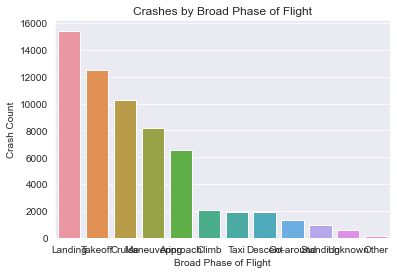

In [1197]:
phase_crashes = df['Broad.phase.of.flight'].value_counts().reset_index(name='Crash_Count')
sns.barplot(x='index', y='Crash_Count', data=phase_crashes)
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Crash Count')
plt.title('Crashes by Broad Phase of Flight')
plt.show()


Is there any relationship between phase of flight and the severity of damage (Aircraft Damage) the plane sustains after a crash?

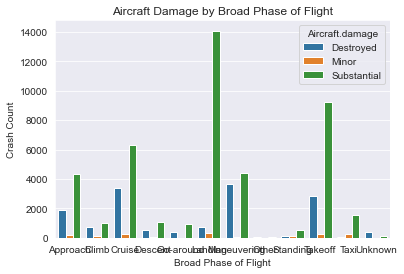

In [1198]:
phase_damage = df.groupby(['Broad.phase.of.flight', 'Aircraft.damage']).size().reset_index(name='Crash_Count')
sns.barplot(x='Broad.phase.of.flight', y='Crash_Count', hue='Aircraft.damage', data=phase_damage)
plt.xlabel('Broad Phase of Flight')
plt.ylabel('Crash Count')
plt.title('Aircraft Damage by Broad Phase of Flight')
plt.show()


What is the relationship (if any) between amateur built and risk of the plane crashing?


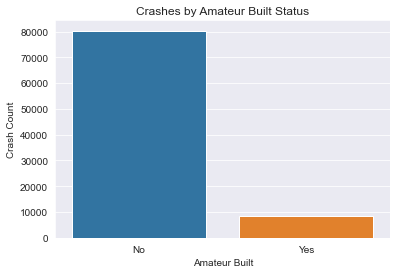

In [1199]:
amateur_crashes = df['Amateur.Built'].value_counts().reset_index(name='Crash_Count')
sns.barplot(x='index', y='Crash_Count', data=amateur_crashes)
plt.xlabel('Amateur Built')
plt.ylabel('Crash Count')
plt.title('Crashes by Amateur Built Status')
plt.show()


More insight into any relationships between the Purpose of flight (business) and plane damage, plane types, etc.

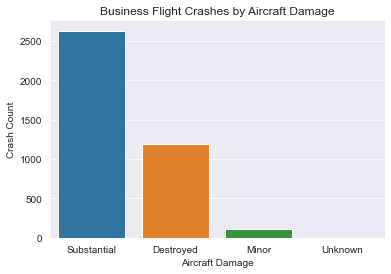

In [1200]:
business_flights = df[df['Purpose.of.flight'] == 'Business']
business_flight_damage = business_flights['Aircraft.damage'].value_counts().reset_index(name='Crash_Count')
sns.barplot(x='index', y='Crash_Count', data=business_flight_damage)
plt.xlabel('Aircraft Damage')
plt.ylabel('Crash Count')
plt.title('Business Flight Crashes by Aircraft Damage')
plt.show()


Correlation or relationship between Injury Severity and Plane Damage


In [1201]:
injury_damage = df.groupby(['Injury.Severity', 'Aircraft.damage']).size().reset_index(name='Crash_Count')
sns.barplot


<function seaborn.categorical.barplot(*, x=None, y=None, hue=None, data=None, order=None, hue_order=None, estimator=<function mean at 0x7f84102e2700>, ci=95, n_boot=1000, units=None, seed=None, orient=None, color=None, palette=None, saturation=0.75, errcolor='.26', errwidth=None, capsize=None, dodge=True, ax=None, **kwargs)>

Investigate the relationship between the number of engines and crash risk:


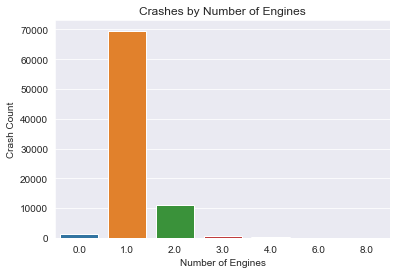

In [1202]:
engine_crashes = df.groupby('Number.of.Engines')['Accident.Number'].count().reset_index(name='Crash_Count')
sns.barplot(x='Number.of.Engines', y='Crash_Count', data=engine_crashes)
plt.xlabel('Number of Engines')
plt.ylabel('Crash Count')
plt.title('Crashes by Number of Engines')
plt.show()


Investigate the relationship between the engine type and crash risk:

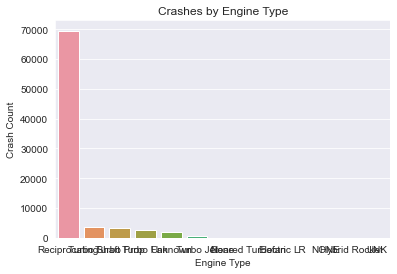

In [1203]:
engine_type_crashes = df['Engine.Type'].value_counts().reset_index(name='Crash_Count')
sns.barplot(x='index', y='Crash_Count', data=engine_type_crashes)
plt.xlabel('Engine Type')
plt.ylabel('Crash Count')
plt.title('Crashes by Engine Type')
plt.show()

Analyze the relationship between the year of the event and the crash risk to see if newer planes have lower crash rates:


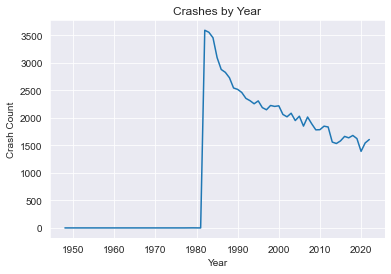

In [1204]:
df['Event.Year'] = pd.to_datetime(df['Event.Date']).dt.year
year_crashes = df.groupby('Event.Year')['Accident.Number'].count().reset_index(name='Crash_Count')
sns.lineplot(x='Event.Year', y='Crash_Count', data=year_crashes)
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.title('Crashes by Year')
plt.show()


Examine the correlation between weather conditions and crash risk:


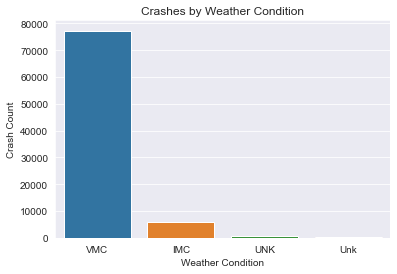

In [1205]:
weather_crashes = df['Weather.Condition'].value_counts().reset_index(name='Crash_Count')
sns.barplot(x='index', y='Crash_Count', data=weather_crashes)
plt.xlabel('Weather Condition')
plt.ylabel('Crash Count')
plt.title('Crashes by Weather Condition')
plt.show()


Investigate if certain aircraft manufacturers have lower crash rates:


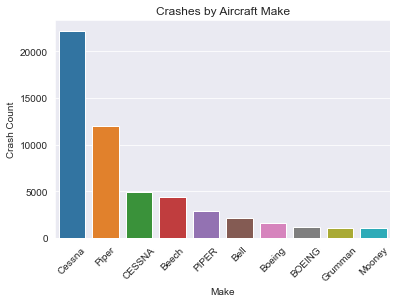

In [1206]:
make_crashes = df.groupby('Make')['Accident.Number'].count().reset_index(name='Crash_Count')
make_crashes = make_crashes.sort_values(by='Crash_Count', ascending=False).head(10)  # Top 10 manufacturers
sns.barplot(x='Make', y='Crash_Count', data=make_crashes)
plt.xlabel('Make')
plt.ylabel('Crash Count')
plt.title('Crashes by Aircraft Make')
plt.xticks(rotation=45)
plt.show()

After analyzing these additional factors, you can combine the insights to make concrete recommendations for the least risky planes to purchase. Look for planes with the lowest crash rates, considering factors such as make/model, engine type, and number of engines. Additionally, consider the impact of weather conditions, the age of the aircraft, and other relevant factors when making your recommendations.

Further investigating what type of planes that are most used for the purpose of business flights:


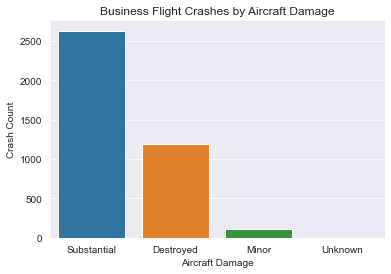

In [1207]:
business_flights = df[df['Purpose.of.flight'] == 'Business']
business_flight_damage = business_flights['Aircraft.damage'].value_counts().reset_index(name='Crash_Count')
sns.barplot(x='index', y='Crash_Count', data=business_flight_damage)
plt.xlabel('Aircraft Damage')
plt.ylabel('Crash Count')
plt.title('Business Flight Crashes by Aircraft Damage')
plt.show()


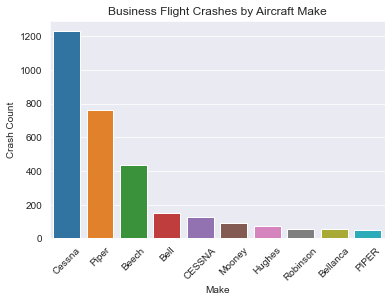

In [1208]:
business_flight_make = business_flights['Make'].value_counts().reset_index(name='Crash_Count')
business_flight_make = business_flight_make.sort_values(by='Crash_Count', ascending=False).head(10)
sns.barplot(x='index', y='Crash_Count', data=business_flight_make)
plt.xlabel('Make')
plt.ylabel('Crash Count')
plt.title('Business Flight Crashes by Aircraft Make')
plt.xticks(rotation=45)
plt.show()


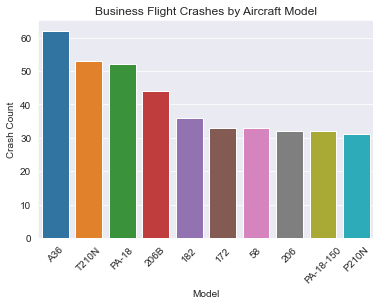

In [1209]:
business_flight_model = business_flights['Model'].value_counts().reset_index(name='Crash_Count')
business_flight_model = business_flight_model.sort_values(by='Crash_Count', ascending=False).head(10)
sns.barplot(x='index', y='Crash_Count', data=business_flight_model)
plt.xlabel('Model')
plt.ylabel('Crash Count')
plt.title('Business Flight Crashes by Aircraft Model')
plt.xticks(rotation=45)
plt.show()

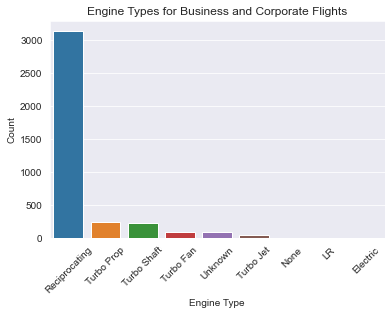

In [1210]:
business_flights = df[df['Purpose.of.flight'].isin(['Business', 'Corporate'])]
engine_type_business = business_flights['Engine.Type'].value_counts().reset_index(name='Count')

sns.barplot(x='index', y='Count', data=engine_type_business)
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.title('Engine Types for Business and Corporate Flights')
plt.xticks(rotation=45)
plt.show()


analyze the risk of crashing for amateur-built planes compared to non-amateur-built planes, and make a recommendation for the best type of plane to purchase:

Calculate the crash rates for amateur-built and non-amateur-built planes:


In [1211]:
total_flights = df.shape[0]
amateur_built_counts = df['Amateur.Built'].value_counts()
crash_rate = (amateur_built_counts / total_flights) * 100


Visualize the crash rates using a bar plot:


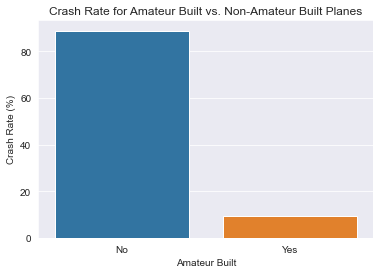

In [1212]:
sns.barplot(x=crash_rate.index, y=crash_rate.values)
plt.xlabel('Amateur Built')
plt.ylabel('Crash Rate (%)')
plt.title('Crash Rate for Amateur Built vs. Non-Amateur Built Planes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


Compare the severity of crashes for amateur-built and non-amateur-built planes:


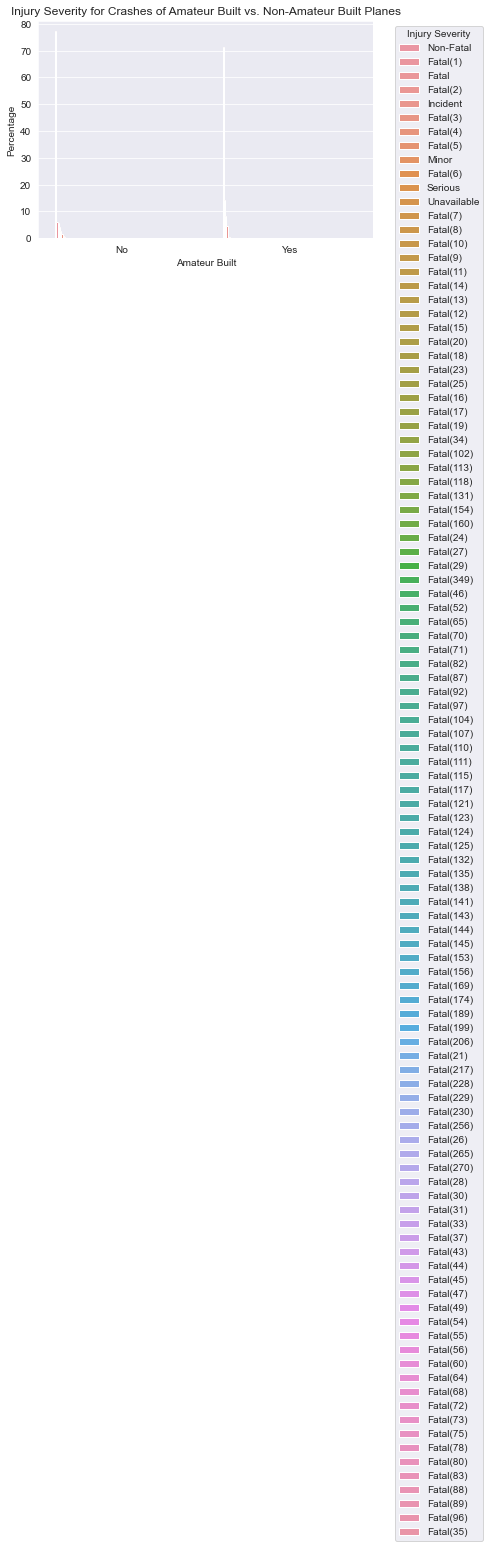

In [1213]:
injury_severity_amateur = df.groupby('Amateur.Built')['Injury.Severity'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
sns.barplot(x='Amateur.Built', y='Percentage', hue='Injury.Severity', data=injury_severity_amateur)
plt.xlabel('Amateur Built')
plt.ylabel('Percentage')
plt.title('Injury Severity for Crashes of Amateur Built vs. Non-Amateur Built Planes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Compare the aircraft damage for amateur-built and non-amateur-built planes:


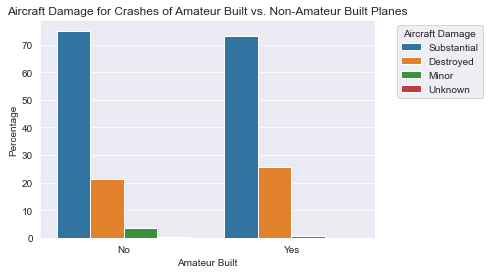

In [1214]:
aircraft_damage_amateur = df.groupby('Amateur.Built')['Aircraft.damage'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')
sns.barplot(x='Amateur.Built', y='Percentage', hue='Aircraft.damage', data=aircraft_damage_amateur)
plt.xlabel('Amateur Built')
plt.ylabel('Percentage')
plt.title('Aircraft Damage for Crashes of Amateur Built vs. Non-Amateur Built Planes')
plt.xticks([0, 1], ['No', 'Yes'])
plt.legend(title='Aircraft Damage', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


These visualizations will provide insights into the crash rates, injury severity, and aircraft damage for amateur-built and non-amateur-built planes. Based on these findings, you can make an informed recommendation on whether or not your company should consider purchasing amateur-built planes.

further exploring the relationship between amateur-built planes vs non-amateur-built planes to make a solid recommendation for the best type of plane to purchase:


In [1215]:
amateur_built = df[df['Amateur.Built'] == 'Yes']
non_amateur_built = df[df['Amateur.Built'] == 'No']
amateur_built['Purpose.of.flight'].value_counts()
non_amateur_built['Purpose.of.flight'].value_counts()

# use the data to find out if amateur-built planes are more likely to crash for a particular purpose of flight than non-amateur-built planes


Personal                     41987
Instructional                10338
Unknown                       6473
Aerial Application            4698
Business                      3949
Positioning                   1624
Other Work Use                1249
Aerial Observation             789
Ferry                          774
Public Aircraft                702
Executive/corporate            544
Flight Test                    245
Skydiving                      182
External Load                  122
Public Aircraft - Federal      104
Banner Tow                     101
Public Aircraft - Local         74
Air Race show                   71
Public Aircraft - State         63
Glider Tow                      53
Firefighting                    40
Air Race/show                   39
Air Drop                        11
ASHO                             5
PUBS                             4
PUBL                             1
Name: Purpose.of.flight, dtype: int64

In [1216]:
# Calculate the crash rates for each purpose of flight, grouped by amateur-built status:

purpose_amateur_crashes = df.groupby(['Amateur.Built', 'Purpose.of.flight'])['Accident.Number'].count().reset_index(name='Crash_Count')
total_counts = purpose_amateur_crashes.groupby('Amateur.Built')['Crash_Count'].sum().reset_index(name='Total_Count')
purpose_amateur_crashes = purpose_amateur_crashes.merge(total_counts, on='Amateur.Built')
purpose_amateur_crashes['Crash_Rate'] = (purpose_amateur_crashes['Crash_Count'] / purpose_amateur_crashes['Total_Count']) * 100


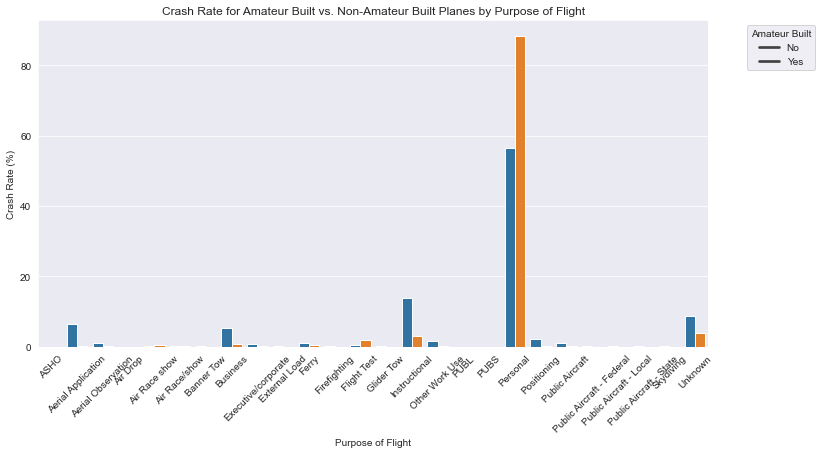

In [1217]:
# Visualize the crash rates for each purpose of flight, grouped by amateur-built status:
plt.figure(figsize=(12, 6))
sns.barplot(x='Purpose.of.flight', y='Crash_Rate', hue='Amateur.Built', data=purpose_amateur_crashes)
plt.xlabel('Purpose of Flight')
plt.ylabel('Crash Rate (%)')
plt.title('Crash Rate for Amateur Built vs. Non-Amateur Built Planes by Purpose of Flight')
plt.xticks(rotation=45)
plt.legend(title='Amateur Built', labels=['No', 'Yes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


identify factors of interest: Select factors from the dataset that you think may have an impact on the frequency or severity of plane crashes. For this example, we'll consider the following factors: 'Amateur.Built', 'Engine.Type', 'Make', 'Model', 'Number.of.Engines', 'Weather.Condition', 'Broad.phase.of.flight', 'Purpose.of.flight'.

Determining hte safest plane make and model to purchase:


Calculate the total number of crashes and the crash severity for each make and model:

In [1218]:
make_model_crash_counts = df.groupby(['Make', 'Model'])['Accident.Number'].count().reset_index(name='Crash_Count')
make_model_severity_counts = df.groupby(['Make', 'Model'])['Injury.Severity'].value_counts(normalize=True).mul(100).reset_index(name='Percentage')


Merge the crash counts and severity percentages into one dataframe:


In [1219]:
make_model_stats = make_model_crash_counts.merge(make_model_severity_counts, on=['Make', 'Model'])


Filter the dataset to include only makes and models with a substantial number of crashes (you can choose an arbitrary threshold, for example, more than 10 crashes):


In [1220]:
threshold = 10
filtered_make_model_stats = make_model_stats[make_model_stats['Crash_Count'] > threshold]


Calculate a safety score for each make and model based on the crash counts and severity percentages. One possible safety score could be the percentage of crashes with minor or no injuries:

In [1221]:
filtered_make_model_stats = filtered_make_model_stats.copy()
filtered_make_model_stats['Safety_Score'] = filtered_make_model_stats.apply(lambda row: row['Percentage'] if row['Injury.Severity'] in ['Non-Fatal', 'Incident'] else 0, axis=1)


Calculating safety score for each make/model using an alternative method, by taking into account the following factors:
- The weight

Sort the makes and models by their safety score in descending order:


In [1222]:
sorted_make_model_stats = filtered_make_model_stats.sort_values(by='Safety_Score', ascending=False)


Select the make and model with the highest safety score:


In [1223]:
safest_make_model = sorted_make_model_stats.iloc[0][['Make', 'Model']]
print('The safest make and model is {} {}'.format(safest_make_model['Make'], safest_make_model['Model']))



The safest make and model is Let BLANIK L-13


visualize the top N safest makes and models:

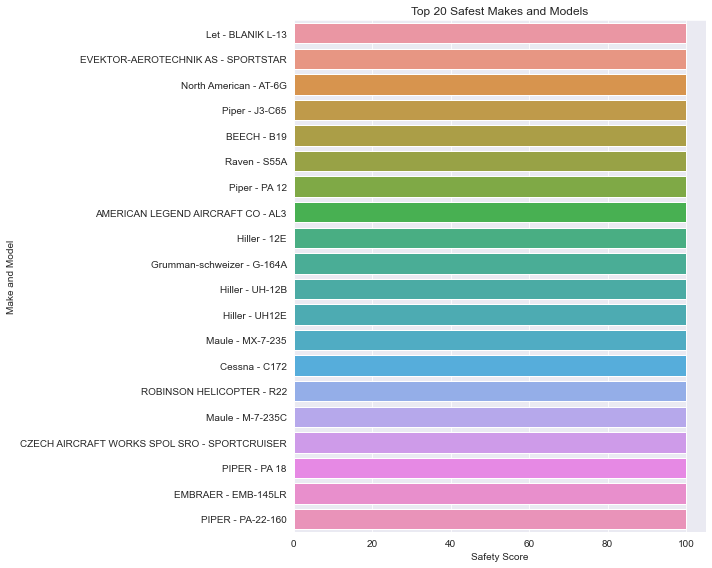

In [1224]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# Keep the top N makes and models for better visualization
top_n = 20
top_make_models = sorted_make_model_stats.nlargest(top_n, 'Safety_Score')

plt.figure(figsize=(10, 8))
sns.barplot(x='Safety_Score', y=top_make_models['Make'] + " - " + top_make_models['Model'], data=top_make_models, orient='h')
plt.xlabel('Safety Score')
plt.ylabel('Make and Model')
plt.title(f'Top {top_n} Safest Makes and Models')
plt.tight_layout()
plt.show()
